# Zomato EDA - Indian Restaurants 

<img src="zomatoimage.jpeg" style="height:500px; Width:1200px;">


## Introduction

This project aims to perform an Exploratory Data Analysis (EDA) on the dataset of Indian restaurants listed on Zomato, a popular online food delivery and restaurant discovery platform. The analysis will provide insights into various aspects of the restaurants, such as their geographical distribution, ratings, cuisines offered, cost for two, and customer reviews. By leveraging data visualization techniques, we aim to uncover patterns and trends that can help restaurant owners, customers, and Zomato itself. The study will also explore factors influencing customer ratings and the popularity of different cuisines across various cities in India. The ultimate goal is to derive meaningful conclusions that can enhance decision-making processes for stakeholders in the food and beverage industry.

In [116]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading dataset

In [287]:
data = pd.read_csv("zomato.csv")
data

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171164,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


### Applying some basic functions to get details of the dataset

In [289]:
data.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [292]:
data.tail(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171164,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['CafÃ©'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [294]:
# to get column names from dataframe

data.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [296]:
# to get row index

data.index

RangeIndex(start=0, stop=211944, step=1)

In [298]:
# to get values from the dataframe

data.values

array([[3400299, 'Bikanervala', "['Quick Bites']", ..., 0.0, -1, -1],
       [3400005, 'Mama Chicken Mama Franky House', "['Quick Bites']",
        ..., 0.0, -1, -1],
       [3401013, 'Bhagat Halwai', "['Quick Bites']", ..., 0.0, 1, -1],
       ...,
       [18984164, 'The Grand Thakar', "['Casual Dining']", ..., 0.0, -1,
        -1],
       [3201138, 'Subway', "['Quick Bites']", ..., 0.0, 1, -1],
       [18879846, "Freshco's - The Health Cafe", "['CafÃ©']", ..., 0.0,
        1, -1]], dtype=object)

In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

### Data cleanings

### Removing duplicates
Its important to remove duplicate rows to avoid biasness in our analysis. 

Since res_id is unique identifier of our restaurants, we can use it to remove duplicates.

In [304]:
data.head();
data

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171164,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [306]:
data.drop_duplicates(["res_id"], keep = 'first' , inplace = True)
data.shape

(55568, 26)

### Dealing with missing values
Now let's see how many variables have missing values.

In [309]:
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

We have 5 variables with some kind of missing values. 
Since zipcode has ~80% missing data, its better to not consider it at all. The other 4 features can be delt with some kind of imputation, but before going through the trouble, its better to look and decide whether they would be beneficial for our analysis or we can simply omit them.

### Omitting not useful features

Here we will look at each feature and decide to consider them for our analysis or not:- 
1. <b>res_id</b> - Unique ID for each restaurant
2. <b>name</b> - Name is useful since we will use it to find top restaurants
3. <b>establishment</b> - Let's see what type of values we have in establishment

In [312]:
data["establishment"].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['CafÃ©']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [314]:
print(data["establishment"].unique()[0])
print(type(data["establishment"].unique()[0]))

['Quick Bites']
<class 'str'>


##### Establishment looks like a nice feature to perform EDA, however each value has an unwanted square brackets and quotes which seems noisy. Let's remove them with <b>apply( )</b> function.
Also, we have one value which is an empty string, let's rename it to "NA" to avoid confusion.

In [317]:
# Removing [' '] from each value
print(data["establishment"].unique()[0])
data["establishment"] = data["establishment"].apply(lambda x:x[2:-2])
print(data["establishment"].unique()[0])

# Changing ''  to 'NA'
print(data["establishment"].unique())
data["establishment"] = data["establishment"].apply(lambda x : np.where(x=="", "NA", x))
print(data["establishment"].unique())

['Quick Bites']
Quick Bites
['Quick Bites' 'Casual Dining' 'Bakery' 'CafÃ©' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
['Quick Bites' 'Casual Dining' 'Bakery' 'CafÃ©' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


4. url - URL is the link to restaurant's page which is not useful for us
5. address - Not useful since it has long strings and its difficult to classify
6. city - Let's check unique cities


In [320]:
len(data[data["city"]=="Pune"])

1843

In [322]:
len(data.city.unique())

99

In [324]:
data['city'].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

* Look's good. 

7. city_id- We can uniquely use city name or id. So one feature is enough
8. locality- Let's see number of unique values

In [327]:
data["locality"].nunique()

3731

* Although it can be an interesting feature, but since this feature has so many unique classes, we will avoid it.

9. latitude - Can be helpful while using geographic maps, but we won't be doing that here

10. longitude - Same as above

11. zipcode - Approx 80% missing values

12. country_id - Since this dataset is for Indian restaurants, there should be just one unique id here. Let's check.



In [330]:
data["country_id"].nunique()

1

13. locality_verbose - Same as locality


In [333]:
data["locality_verbose"].nunique()

3910

14. cuisines - This feature has some missing values. Even though this has 9382 unique classes, we can see that each restaurant has a list of cusinies and the composition of the list is the reason why we have so many different cuisine classes. Let's check actual number of unique cuisine classes. But first we need to replace null values with a label.


In [336]:
print(data["cuisines"].nunique())
print(data["cuisines"].unique())

9382
['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


In [338]:
data["cuisines"]=data["cuisines"].fillna("No cuisines")
data["cuisines"].nunique()


9383

In [340]:
cuisines = []
data["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines  = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


15. timings - This also has missing data, however it has 7740 unique classes. Also, it is not structured even if we try to reduce the number classes like we did in cuisines.

Its better to omit it altogether.



In [343]:
print(data["timings"].nunique())
print(data["timings"].unique())

7740
['8:30am â€“ 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ... '8am â€“ 2:30pm, 5pm â€“ 10pm (Mon-Sun)'
 '8am â€“ 3pm, 6:30pm â€“ 11pm (Mon-Sun)'
 '4pm â€“ 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm â€“ 11:30pm (Thu)']


16. average_cost_for_two - This is an interesting feature for our analysis, although the value "0" is strange and should be an outlier

In [346]:
data["average_cost_for_two"].nunique()

145

17. price_range - Average prices automatically characterized into bins


In [349]:
data["price_range"].unique()

array([2, 1, 3, 4], dtype=int64)

18. currency - Only one class. Not useful


In [352]:
data["currency"].unique()

array(['Rs.'], dtype=object)

19. highlights - They represent certain features that the restaurant specializes in and wants to highlight to their customers. Each restaurant has a list of highlights which makes the composition different for each one. We can, filter this and find total unique highlights from all restaurants.


In [355]:
print(data["highlights"].nunique())
print(data["highlights"].unique())

31228
["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"]


In [357]:
hl = []
data["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())

Total number of unique highlights =  104


20. aggregate_rating - Rating given to the restaurant
21. rating_text - Characterisation of numeric rating into bins by using labels. We will be using direct ratings in our analysis, so we can ignore this.
22. votes - Number of votes contributing to the rating
23. photo_count - Photo uploads in reviews
- Let's check the mean and range of above features



In [360]:
data[["aggregate_rating","votes","photo_count"]].describe().loc[["mean","min","max"]]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
min,0.000000,-18.000000,0.00000
max,4.900000,42539.000000,17702.00000


Rating ranges between 0 and 5 while 42539 are the maximum votes given to a restaurant. The negative value in votes might be an outlier.

24. opentable_support - Not useful since no restaurant has True value for this
25. delivery - This feature has 3 classes but there is no explanation for those classes. We can consider -1 and 0 to be one class or ignore this feature for now
26. takeaway - Again not useful since it only has one class


In [363]:
data["opentable_support"].unique()

array([ 0., nan])

In [365]:
data["delivery"].unique()

array([-1,  1,  0], dtype=int64)

In [367]:
data["takeaway"].unique()

array([-1], dtype=int64)

## Exploratory Data Analysis (EDA)
### Restaurant chains
- Here chains represent restaurants with more than one outlet

### Chains vs Outlets

In [370]:
outlets = data["name"].value_counts()
outlets

name
Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: count, Length: 41100, dtype: int64

In [372]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [374]:
data.shape

(55568, 26)

In [376]:
chains

name
Domino's Pizza              399
Cafe Coffee Day             315
KFC                         204
Baskin Robbins              202
Keventers                   189
                           ... 
Santoor Restaurant            2
The Ice House                 2
Zaatar Arabic Restaurant      2
Ashok & Ashok Meat Dhaba      2
Hotel Tara                    2
Name: count, Length: 4890, dtype: int64

In [378]:
print("Total Restaurants = ", data.shape[0])
print("Total Restaurants that are part of some chain = ", data.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((data.shape[0] - single.shape[0]) / data.shape[0],2)*100, "%")

Total Restaurants =  55568
Total Restaurants that are part of some chain =  19358
Percentage of Restaurants that are part of a chain =  35.0 %



* 35% of total restaurants are part of some kind of restaurant chain. Here, we should account for cases where two different retaurants might have exact same name but are not related to each other.

#### Top restaurant chains (by number of outlets)
* Let's plot a horizontal bar graph to look at Top 10 restaurant chains. For the color scheme, we are using a list of pre-defined and selected colours to make the chart more appealing. If you want your analysis to look good visually, you should customize each and every element of your graph.



In [381]:
chains.head(10)

name
Domino's Pizza     399
Cafe Coffee Day    315
KFC                204
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: count, dtype: int64

In [383]:
top10_chains = data["name"].value_counts()[:10].sort_values(ascending=True)

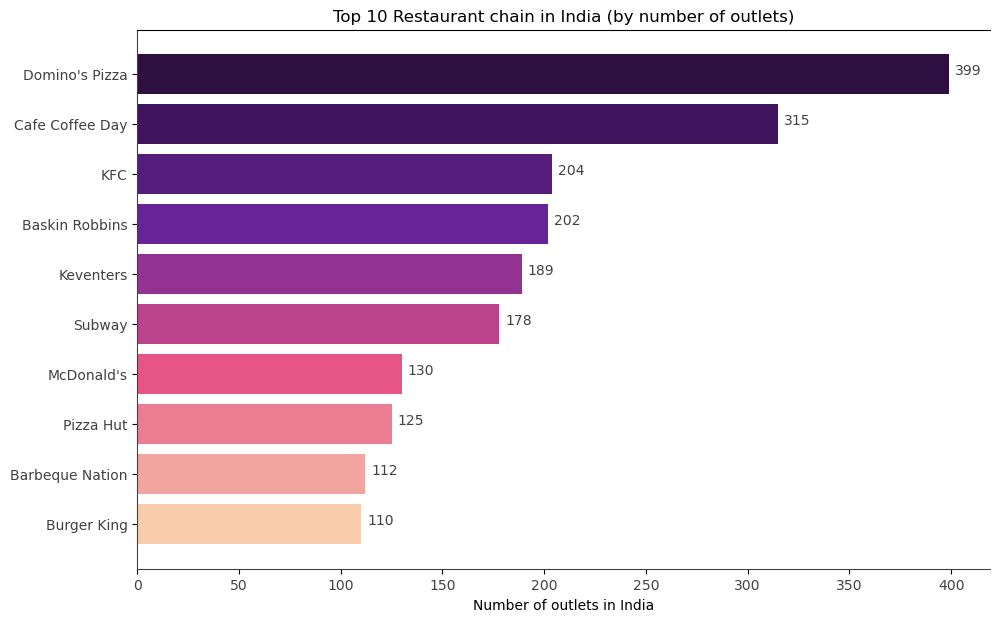

In [385]:
height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)
 
plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by number of outlets)")


plt.show()

* This chart is majorly dominaed by big fast food chains

### Establishment Types
#### Number of restaurants (by establishment type)


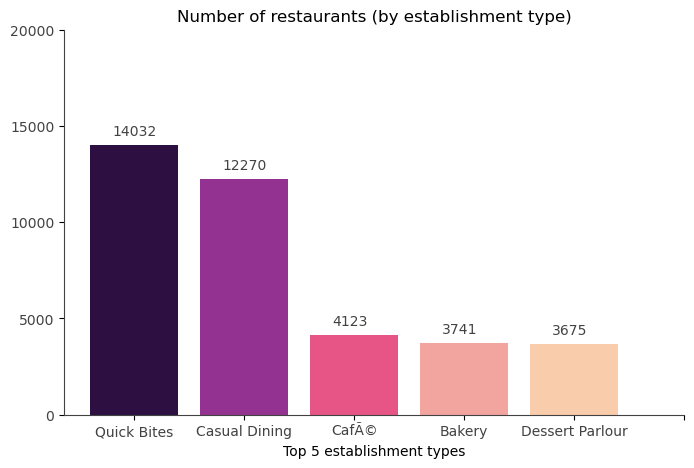

In [388]:
est_count = data.groupby("establishment").count()["res_id"].sort_values(ascending=False)[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(est_count.index, est_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 establishment types")

for i, v in enumerate(est_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by establishment type)")


plt.show()

- Top 3 represents more casual and quick service restaurants, then from 4-6 we have dessert based shops.


## Cities
### Number of restaurants (by city)


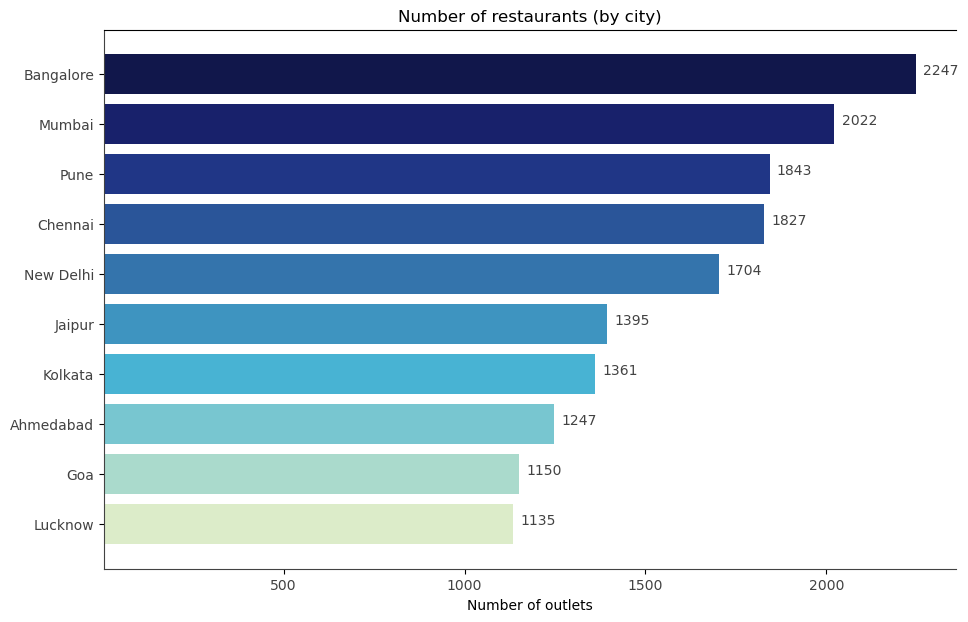

In [392]:
city_counts = data.groupby("city").count()["res_id"].sort_values(ascending=True)[-10:]

height = pd.Series(city_counts.values)
bars = city_counts.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets")

for i, v in enumerate(height):
    ax.text(v + 20, i, str(v), color='#424242')
plt.title("Number of restaurants (by city)")


plt.show()

- As expected, metro cities have more number of restaurants than others with South India dominating the Top 4



### Cuisine
##### Unique cuisines


In [396]:
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


#### Number of restaurants (by cuisine)

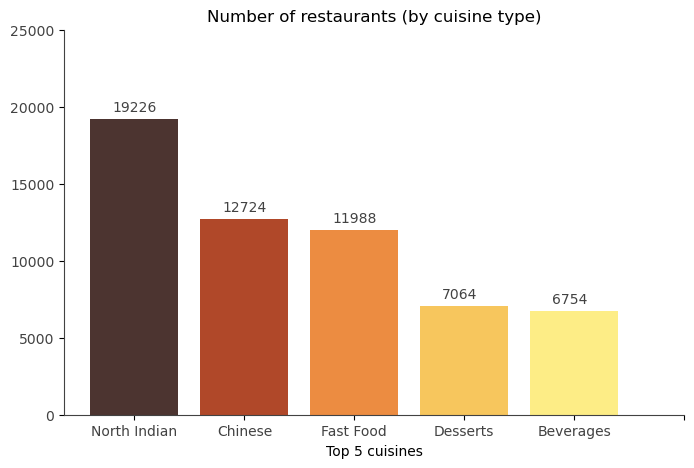

In [399]:
c_count = cuisines.value_counts()[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86']
plt.bar(c_count.index, c_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 30000, 5000), color="#424242")
plt.xlabel("Top 5 cuisines")

for i, v in enumerate(c_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by cuisine type)")


plt.show()

- Surprisingly, Chinese food comes second in the list of cuisines that Indians prefer, even more than fast food, desserts and South Indian food.

### Highest rated cuisines


In [402]:
data["cuisines2"] = data['cuisines'].apply(lambda x : x.split(", "))

cuisines_list = cuisines.unique().tolist()
zeros = np.zeros(shape=(len(cuisines_list),2))
c_and_r = pd.DataFrame(zeros, index=cuisines_list, columns=["Sum","Total"])

In [404]:
for i, x in data.iterrows():
    for j in x["cuisines2"]:
        c_and_r.loc[j]["Sum"] += x["aggregate_rating"]  
        c_and_r.loc[j]["Total"] += 1

In [405]:
c_and_r["Mean"] = c_and_r["Sum"] / c_and_r["Total"]
c_and_r

,Sum,Total,Mean
North Indian,60055.2,19226.0,3.123645
South Indian,18635.3,6381.0,2.920436
Mithai,8545.7,3144.0,2.718098
Street Food,10794.6,3715.0,2.905680
Desserts,22723.9,7064.0,3.216860
...,...,...,...
Swedish,3.6,1.0,3.600000
Cake,6.4,2.0,3.200000
Garhwali,3.3,2.0,1.650000
Vegan,3.5,1.0,3.500000


In [406]:
c_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
Egyptian,4.416667,6.0
PokÃ©,4.350000,12.0
Fusion,4.350000,2.0
International,4.300000,1.0
Tex-Mex,4.293939,33.0
Singaporean,4.287500,16.0
Moroccan,4.258333,12.0
Sushi,4.206087,115.0
Greek,4.159091,22.0
Mediterranean,4.130275,327.0


- We can ignore a few cuisines in this list since they are available in less number. But the overall conclusion which can be drawn is that International (and rarely available) cuisines are rated higher than local cuisines.

### Highlights/Features of restaurants
### Unique highlights

In [408]:
print("Total number of unique cuisines = ", hl.nunique())

Total number of unique cuisines =  104


### Number of restaurants (by highlights)


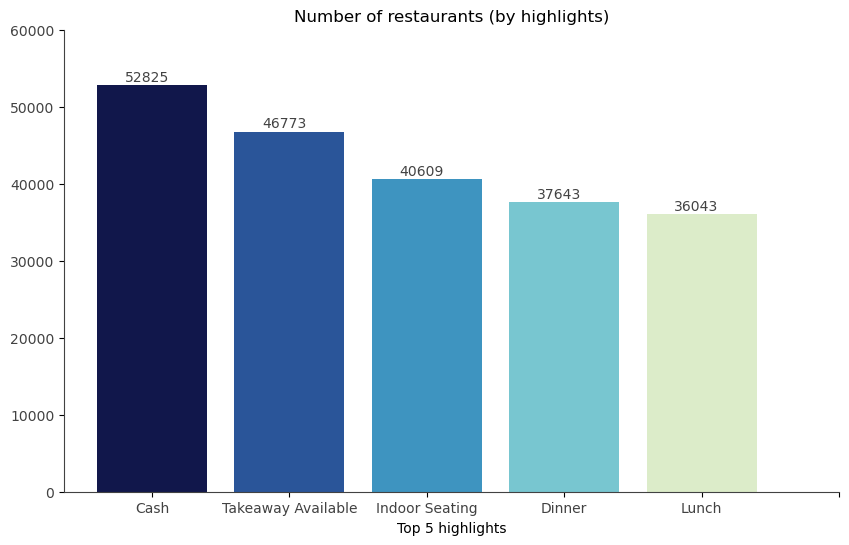

In [410]:
h_count = hl.value_counts()[:5]

fig = plt.figure(figsize=[10,6], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9']
plt.bar(h_count.index, h_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 70000, 10000), color="#424242")
plt.xlabel("Top 5 highlights")

for i, v in enumerate(h_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by highlights)")


plt.show()

- Top 5 highlights doesn't convey much information since they are very trivial to almost every restaurant. Let's look at uncommon highlights that matter more to the customers.

### Highest rated highlights


In [412]:
data["highlights"][0]

"['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"

In [413]:
data["highlights2"] = data['highlights'].apply(lambda x : x[2:-2].split("', '"))

hl_list = hl.unique().tolist()
zeros = np.zeros(shape=(len(hl_list),2))
h_and_r = pd.DataFrame(zeros, index=hl_list, columns=["Sum","Total"])

In [414]:
for i, x in data.iterrows():
    for j in x["highlights2"]:
        h_and_r.loc[j]["Sum"] += x["aggregate_rating"]  
        h_and_r.loc[j]["Total"] += 1

In [415]:
h_and_r["Mean"] = h_and_r["Sum"] / h_and_r["Total"]
h_and_r

,Sum,Total,Mean
Lunch,113340.8,36043.0,3.144600
Takeaway Available,139848.5,46773.0,2.989941
Credit Card,94107.2,27530.0,3.418351
Dinner,118364.5,37643.0,3.144396
Cash,157862.8,52825.0,2.988411
...,...,...,...
Celebrity Frequented,90.1,22.0,4.095455
Alipay Accepted,3.0,1.0,3.000000
Subscription Available,4.1,1.0,4.100000
Subscription Required,4.5,1.0,4.500000


In [416]:
h_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
Subscription Required,4.500000,1.0
Speakeasy,4.300000,3.0
Gastro Pub,4.198551,69.0
Craft Beer,4.197297,148.0
Romantic Dining,4.162416,149.0
Sneakpeek,4.128316,392.0
Subscription Available,4.100000,1.0
Celebrity Frequented,4.095455,22.0
Keto Options,4.049153,59.0
Pet Friendly,4.017576,165.0


- We can safely ignore highlights which have a frequency of less than 10 since they can be considered as outliers. Features like Gastro pub, Craft beer, Romantic dining and Sneakpeek are well received among customers.

### Highlights wordcloud




### Ratings and cost
### Ratings distribution
- Let's see how the ratings are distributes



C:\Users\likhitha\AppData\Local\Temp\ipykernel_8564\2259594370.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['aggregate_rating'], shade=True)
D:\Users\likhitha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


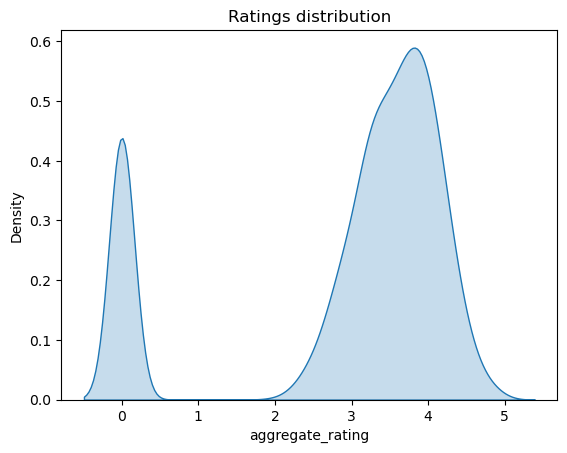

In [454]:
sns.kdeplot(data['aggregate_rating'], shade=True)
plt.title("Ratings distribution")
plt.show()

- There is a huge spike at 0 which might account for newly opened or unrated restaurants. On average, majority of restaurants have rating between 3 to 4 with fewer restaurants managing to go beyond 4.

### Avergae cost for two distribution


C:\Users\likhitha\AppData\Local\Temp\ipykernel_8564\3483524634.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['average_cost_for_two'], shade=True)
D:\Users\likhitha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


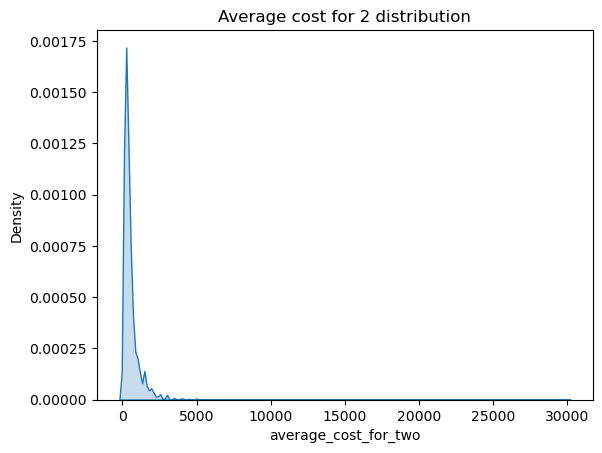

In [429]:
sns.kdeplot(data['average_cost_for_two'], shade=True)
plt.title("Average cost for 2 distribution")
plt.show()

- With few restaurants charging average of Rs.25000+ for two, this graph is extremely skewed. Let's take a closer look at a lower range of 0 to 60000.



C:\Users\likhitha\AppData\Local\Temp\ipykernel_8564\1606474467.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['average_cost_for_two'], shade=True)
D:\Users\likhitha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


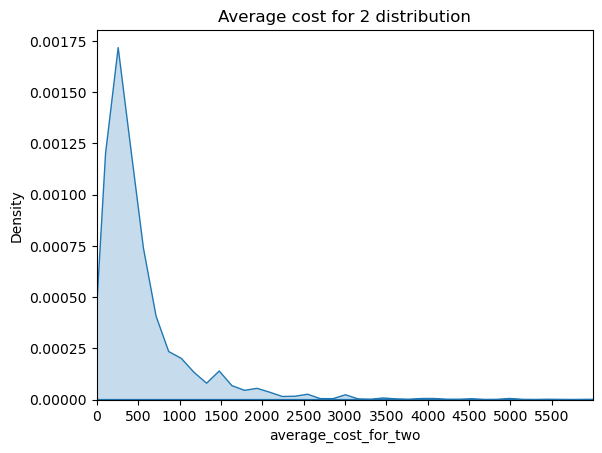

In [432]:
sns.kdeplot(data['average_cost_for_two'], shade=True)
plt.xlim([0, 6000])
plt.xticks(range(0,6000,500))
plt.title("Average cost for 2 distribution")
plt.show()

- Majority of restaurants are budget friendly with an average cost between Rs.250 to Rs.800 for two.

### Price range count


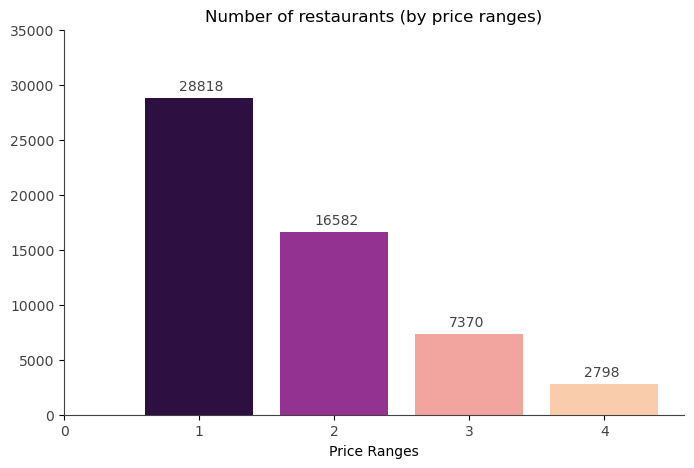

In [435]:
pr_count = data.groupby("price_range").count()["name"]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
plt.bar(pr_count.index, pr_count.values, color=colors)

plt.xticks(range(0, 5), color="#424242")
plt.yticks(range(0, 40000, 5000), color="#424242")
plt.xlabel("Price Ranges")

for i, v in enumerate(pr_count):
    ax.text(i+0.85, v+700, str(v), color='#424242')
plt.title("Number of restaurants (by price ranges)")


plt.show()

- Price range chart supports our previous observation from the Average cost chart. Number of restaurant decreases with increase in price range.

### Relation between Average price for two and Rating


In [438]:
np.round(data[["average_cost_for_two","aggregate_rating"]].corr()["average_cost_for_two"][1],2)

C:\Users\likhitha\AppData\Local\Temp\ipykernel_8564\2753989930.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round(data[["average_cost_for_two","aggregate_rating"]].corr()["average_cost_for_two"][1],2)


0.25

In [440]:
A correlation can be seen between restaurant average cost and rating

SyntaxError: invalid syntax (793102323.py, line 1)

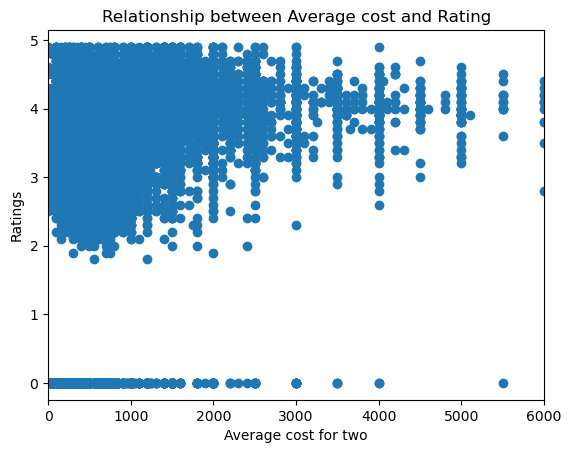

In [442]:
plt.plot("average_cost_for_two","aggregate_rating", data=data, linestyle="none", marker="o")
plt.xlim([0,6000])
plt.title("Relationship between Average cost and Rating")
plt.xlabel("Average cost for two")
plt.ylabel("Ratings")
plt.show()

- There is definetely a direct relation between the two. Let's take a smaller sample to draw a clearer scatter plot.



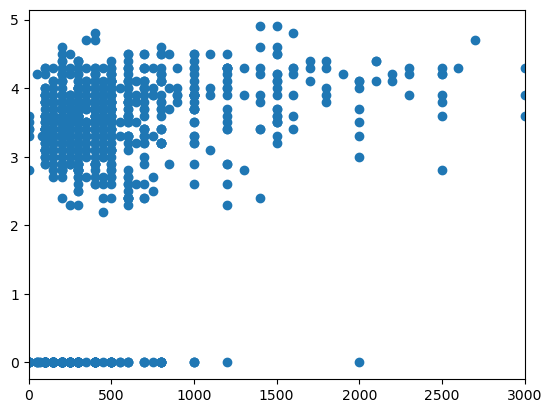

In [445]:
plt.plot("average_cost_for_two","aggregate_rating", data=data.sample(1000), linestyle="none", marker="o")
plt.xlim([0,3000])
plt.show()

- This relation concludes that that as average cost for two increases, there is a better chance that the restaurant will be rated highly. Let's look at price range for a better comparison.

### Relation between Price range and Rating

In [448]:
np.round(data[["price_range","aggregate_rating"]].corr()["price_range"][1],2)

C:\Users\likhitha\AppData\Local\Temp\ipykernel_8564\3032599960.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round(data[["price_range","aggregate_rating"]].corr()["price_range"][1],2)


0.25

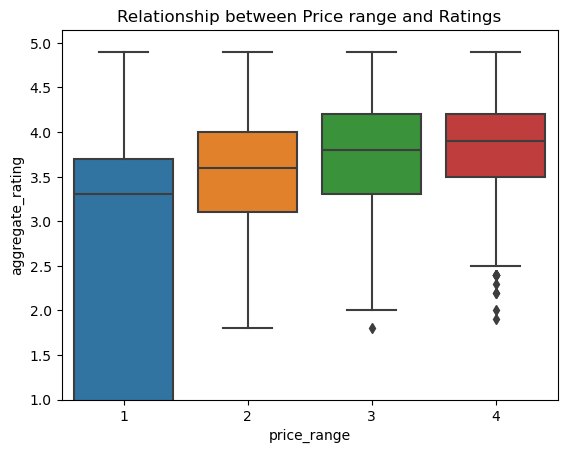

In [450]:
sns.boxplot(x='price_range', y='aggregate_rating', data=data)
plt.ylim(1)
plt.title("Relationship between Price range and Ratings")
plt.show()

- Now, it is clear. The higher the price a restaurant charges, more services they provide and hence more chances of getting good ratings from their customers.

## Conclusions
* After working on this data, we can conclude the following things:-

1. Approx. 35% of restaurants in India are part of some chain
2. Domino's Pizza, Cafe Coffee Day, KFC are the biggest fast food chains in the country with most number of outlets
3. Barbecues and Grill food chains have highest average ratings than other type of restaurants
4. Quick bites and casual dining type of establishment have most number of outlets
5. Establishments with alcohol availability have highest average ratings, votes and photo uploads
6. Banglore has most number of restaurants
7. Gurgaon has highest rated restaurants (average 3.83) whereas Hyderabad has more number of critics (votes). Mumbai and New Delhi dominates for most photo uploads per outlet
8. After North Indian, Chinese is the most prefered cuisine in India
9. International cuisines are better rated than local cuisines
10. Gastro pub, Romantic Dining and Craft Beer features are well rated by customers
11. Most restaurants are rated between 3 and 4
12. Majority of restaurants are budget friendly with average cost of two between Rs.250 to Rs.800
13. There are less number of restaurants at higher price ranges
14. As the average cost of two increases, the chance of a restaurant having higher rating increases
- Now we have come to the end of this project.



In [ ]:
data.to_csv("zomato_final.csv")